#                       Car price prediction using linear regression

## problem statement

<br> A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

   - Which variables are significant in predicting the price of a car
   - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Business Goal

<br> You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [56]:
#surpase warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#Importing CarPrice_Assignment.csv
car_pricing = pd.read_csv("C:\Car_price_prediction\CarPrice_Assignment.csv")

In [58]:
car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [60]:
car_pricing.shape

(205, 26)

In [61]:
car_pricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [62]:
# Checking Null values
car_pricing.isnull().sum()*100/car_pricing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [63]:
#we can  remove carID  as its just a serial number 
car_pricing.drop(['car_ID'], axis =1, inplace = True)

## Step 2: Visualising the Data

**understanding the data**:
- Check if threre is any multicollinearity going on.
- identify if some predictors directly have a strong association with the outcome variable

visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1440x1080 with 0 Axes>

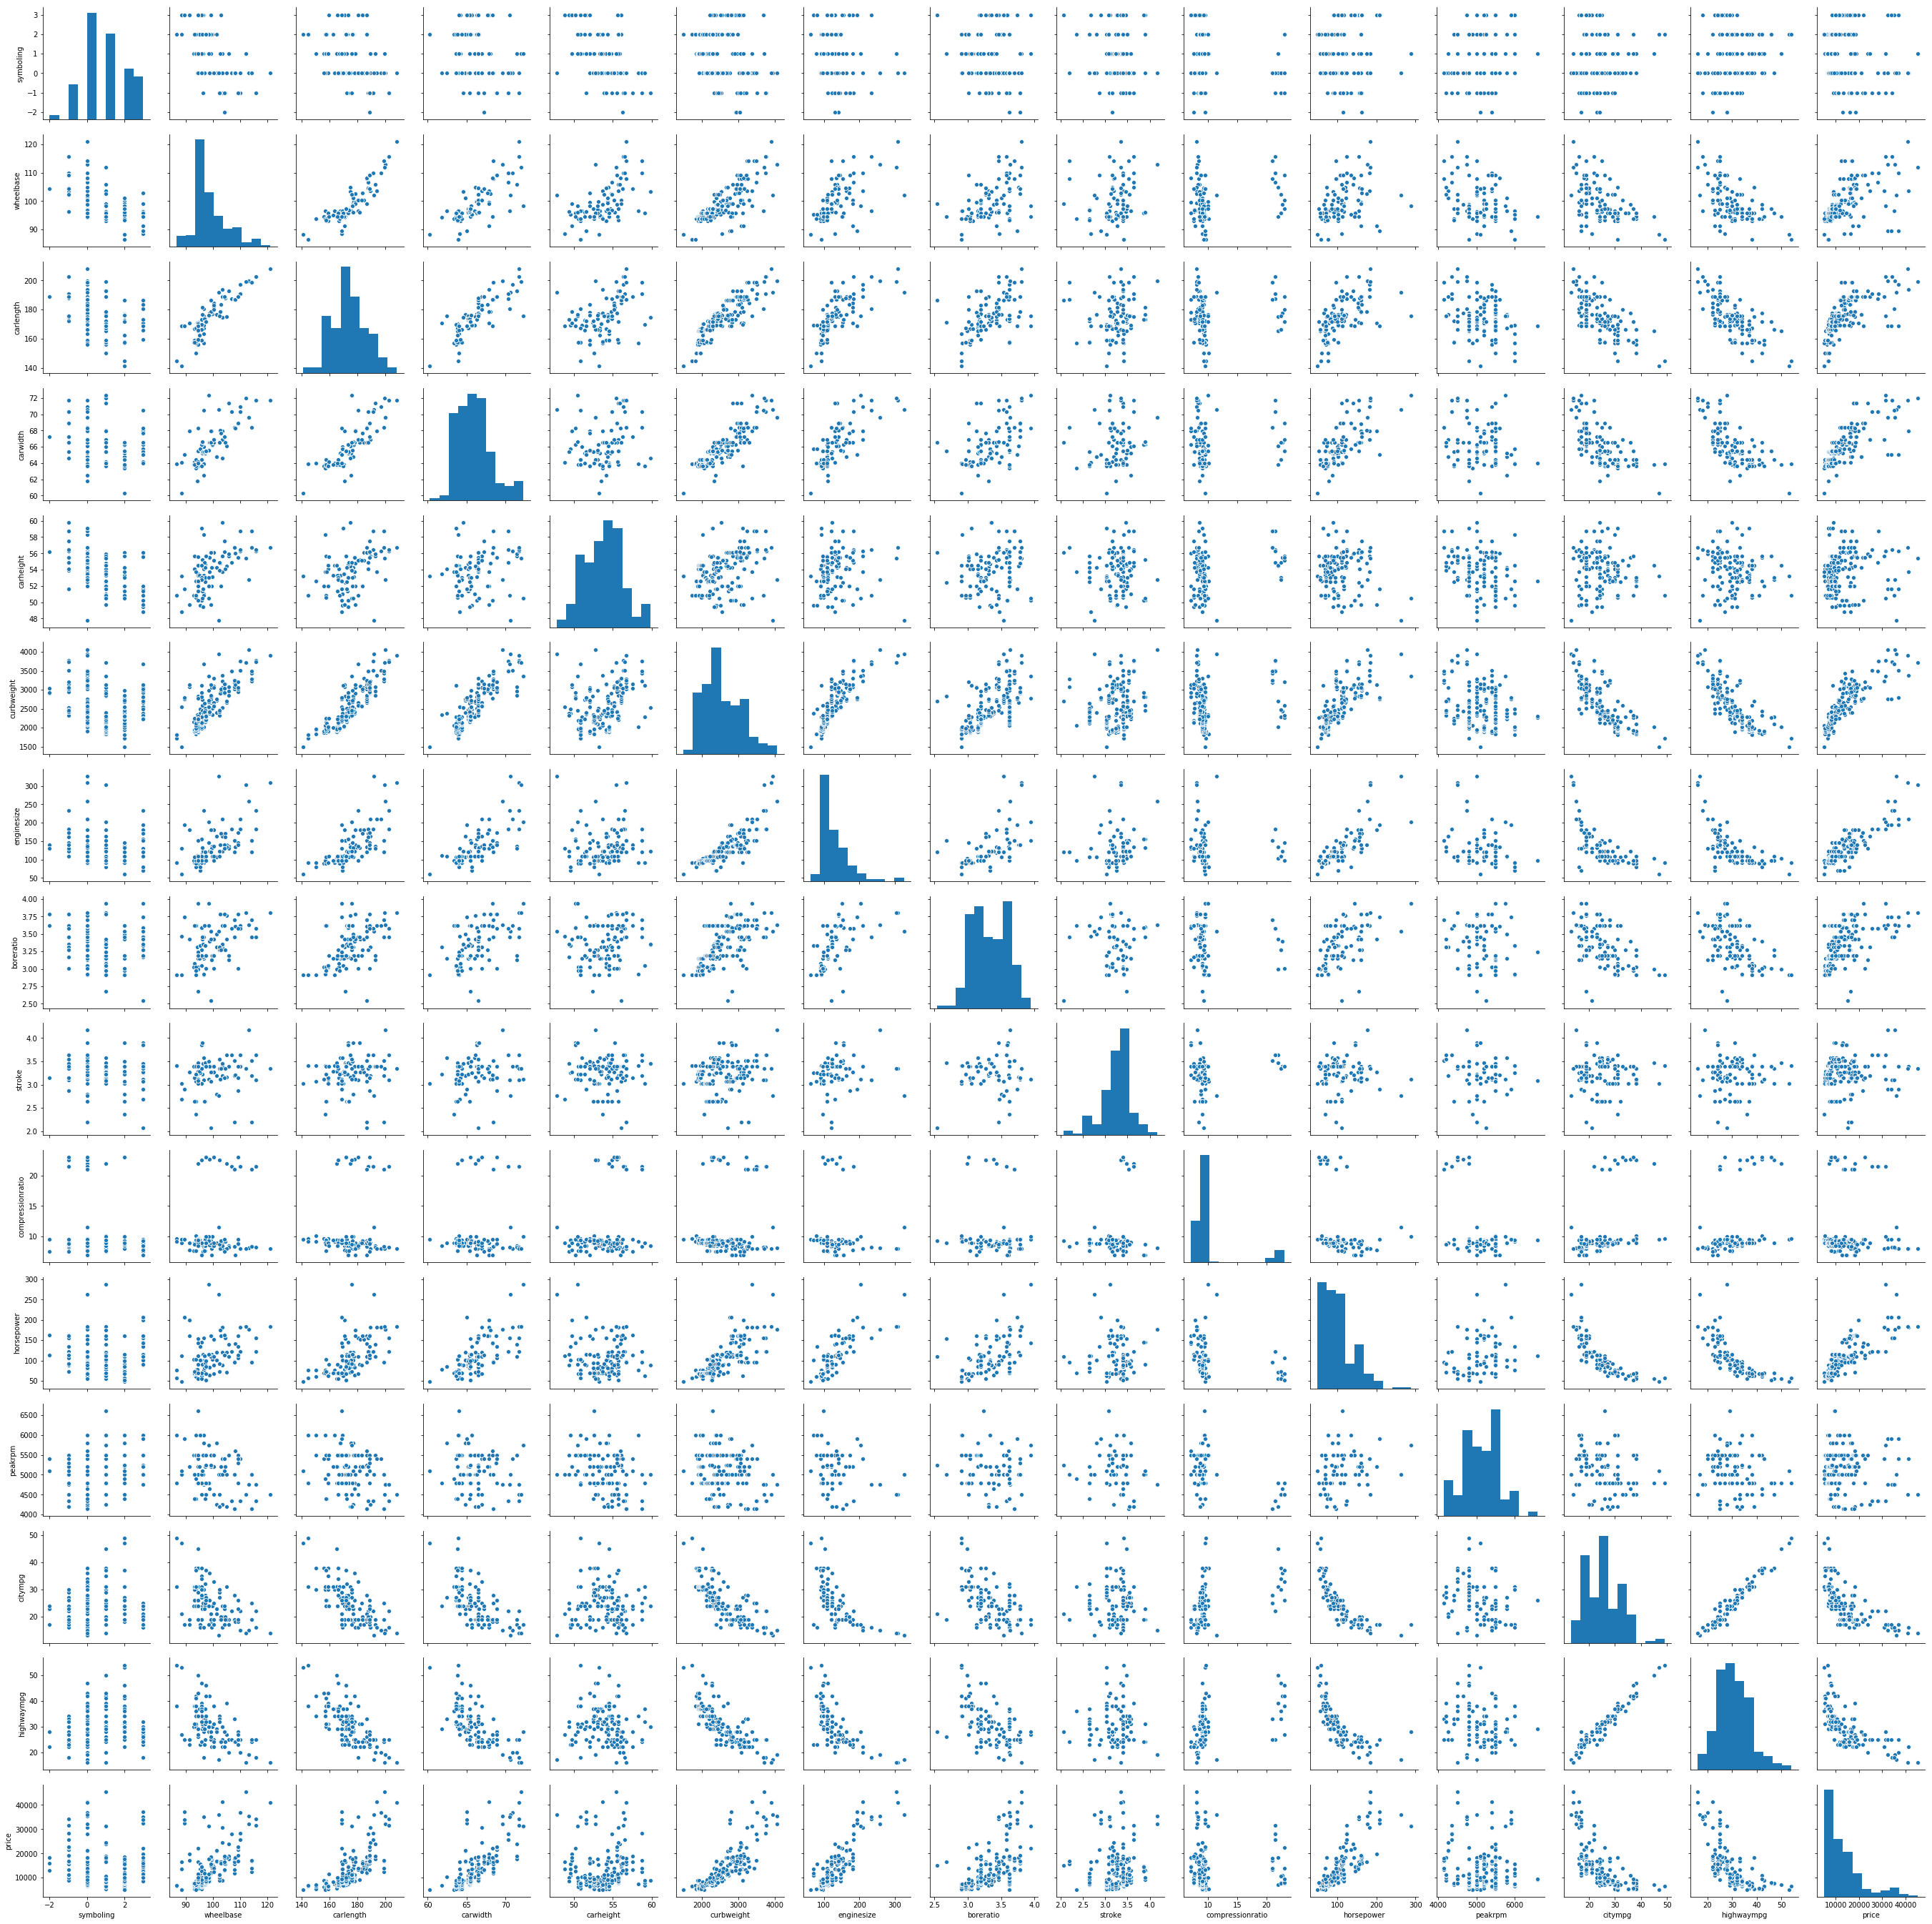

In [64]:
plt.figure(figsize=(20, 15))
sns.pairplot(car_pricing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. 

#### split the CarName and extract only company name. We will rename it to CompanyName.

In [65]:
#Splitting company name from CarName column
CompanyName = car_pricing['CarName'].apply(lambda x : x.split(' ')[0])
car_pricing.insert(3,"CompanyName",CompanyName)
car_pricing.drop(['CarName'],axis=1,inplace=True)
car_pricing.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [66]:
car_pricing.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- There seems to be some spelling error in the CompanyName column.
        maxda = mazda
        Nissan = nissan
        porsche = porcshce
        toyota = toyouta
        vokswagen = volkswagen = vw

In [67]:
#see that some of the companies are misspelled or repeated. Let us fix that.
car_pricing.CompanyName.replace('maxda','mazda',inplace=True)
car_pricing.CompanyName.replace('Nissan','nissan',inplace=True)
car_pricing.CompanyName.replace('porcshce','porsche',inplace=True)
car_pricing.CompanyName.replace('toyouta','toyota',inplace=True)
car_pricing.CompanyName.replace('vokswagen','volkswagen',inplace=True)
car_pricing.CompanyName.replace('vw','volkswagen',inplace=True)

In [68]:
#the names are now fixed.
car_pricing.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

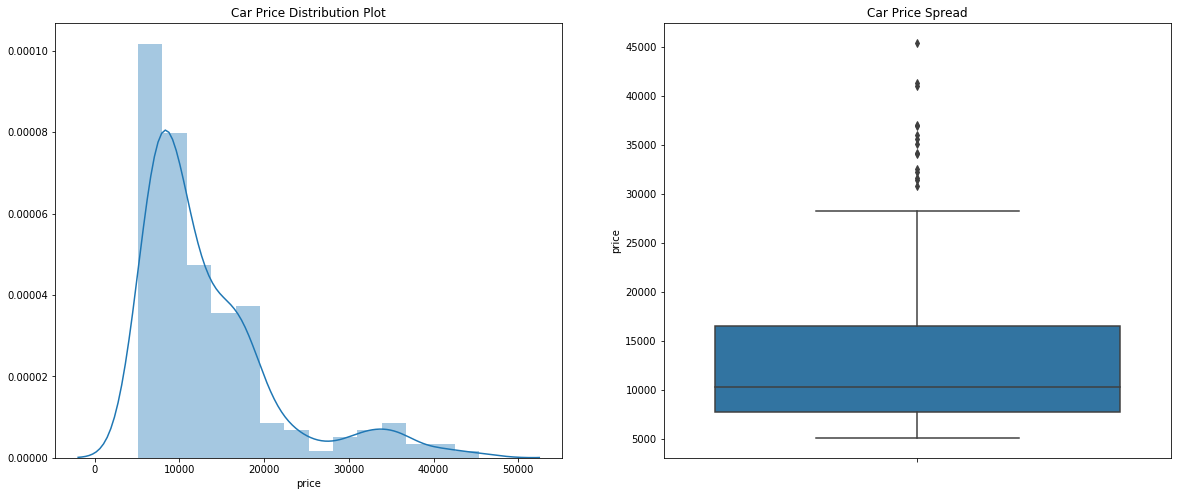

In [69]:
#how the data is distributed by plotting.
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_pricing.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_pricing.price)

plt.show()

- data is skewed by looking at the above plots. What this means is that there are more cheaper cars in our dataset than expensive cars.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
- There is a significant difference between the mean and the median of the price distribution

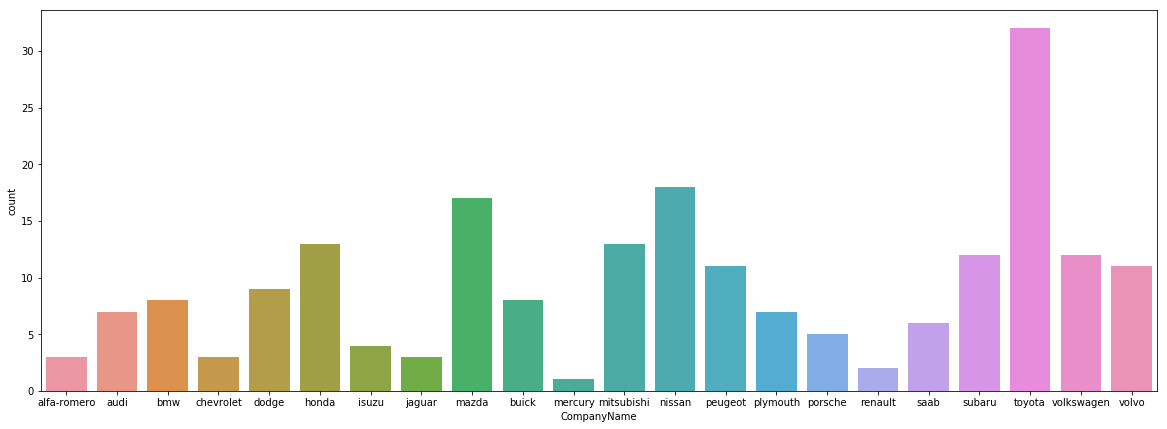

In [70]:
plt.figure(figsize=[20,7])
sns.countplot(car_pricing.CompanyName)

#### most cars in our dataset is manufactured by Toyota

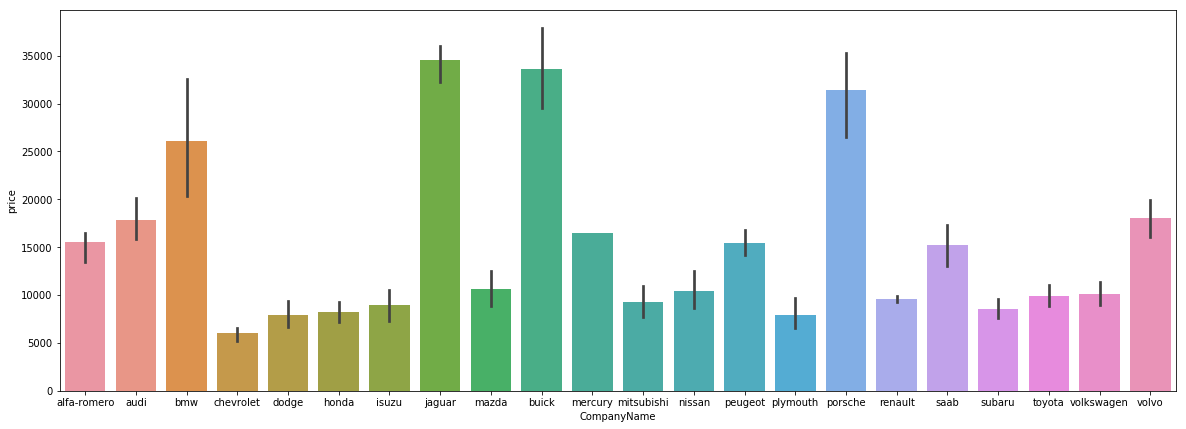

In [71]:
#how company effects the price variable
plt.figure(figsize=[20,7])
sns.barplot(x='CompanyName',y='price',data=car_pricing)

### Jaguar,Buick have highest prices followed by porsche and BMW

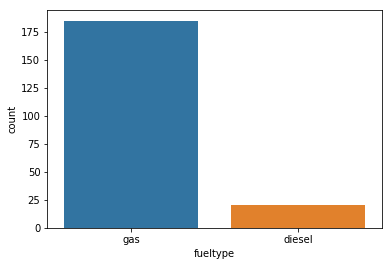

In [72]:
sns.countplot(car_pricing.fueltype)

####  more petrol cars than diesel cars.

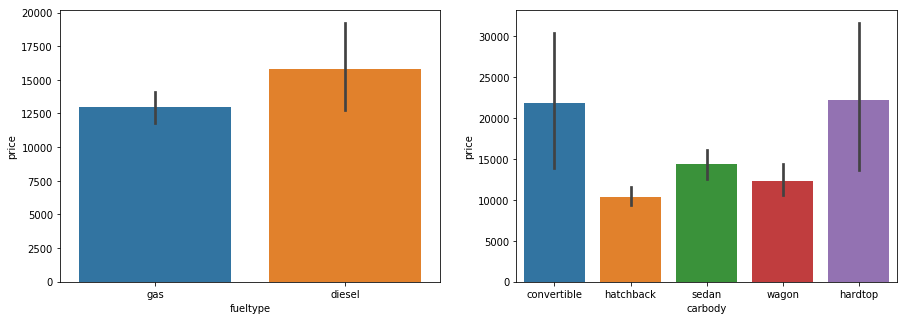

In [73]:
# how each variable affects the price
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.barplot(x='fueltype',y='price',data=car_pricing)

#The plot  gives relation between body type and price.
plt.subplot(1,2,2)
sns.barplot(x='carbody',y='price',data=car_pricing)

plt.show()

### Diesel cars are more costly than petrol cars.

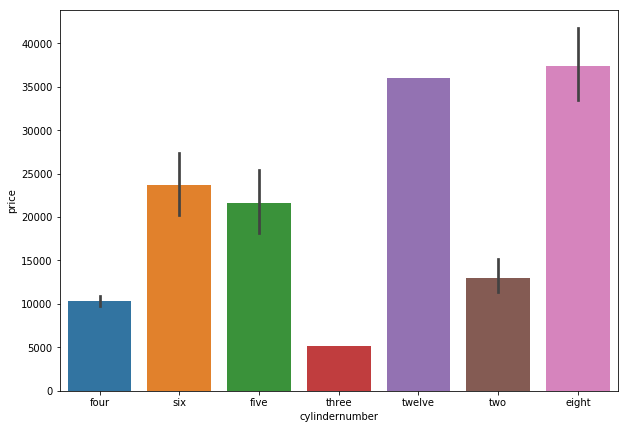

In [74]:
#the relation between number of cylinders and price.
#if cylinders increase price also will increase
plt.figure(figsize=[10,7])
sns.barplot(x='cylindernumber',y='price',data=car_pricing)

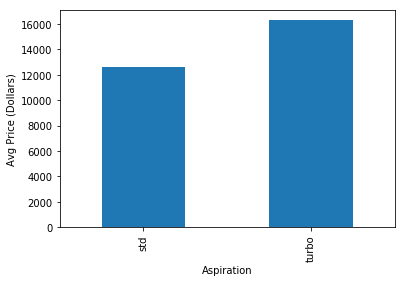

In [75]:
#aspiration vs price
df_aspir_avg_price = car_pricing[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

### Cars with turbo aspiration engine are priced more than standard ones.

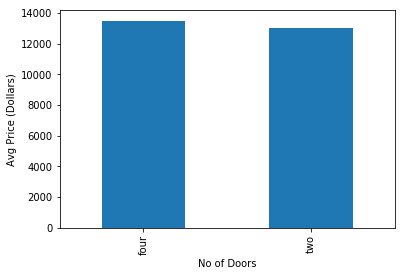

In [76]:
#Door number vs price
df_door_avg_price = car_pricing[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

###  Number of doors doesn't seem to have much effect on price.

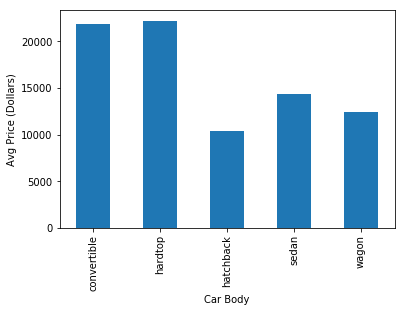

In [77]:
#carbody vs price
df_body_avg_price = car_pricing[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show() 

### Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

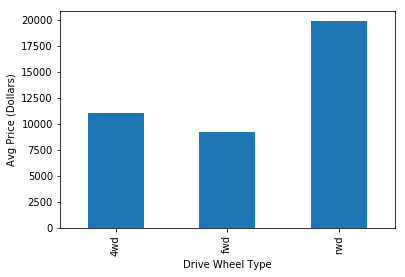

In [78]:
#drive wheel vs price
df_drivewheel_avg_price = car_pricing[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

### Cars with Rear wheel drive have a higher price value.

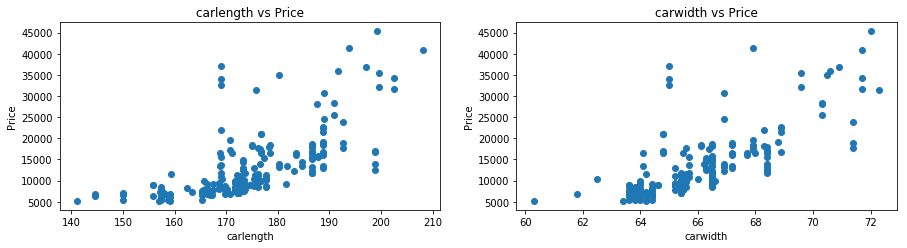

In [79]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car_pricing[x],car_pricing['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,20))

scatter('carlength', 1)
scatter('carwidth', 2)


### carwidth, and curbweight seems to have a poitive correlation with price.

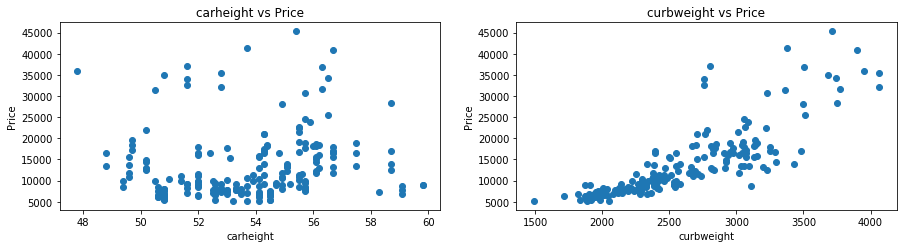

In [80]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car_pricing[x],car_pricing['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,20))
scatter('carheight', 3)
scatter('curbweight', 4)

 ### carheight doesn't show any significant trend with price.curbweight is positively corelated with price

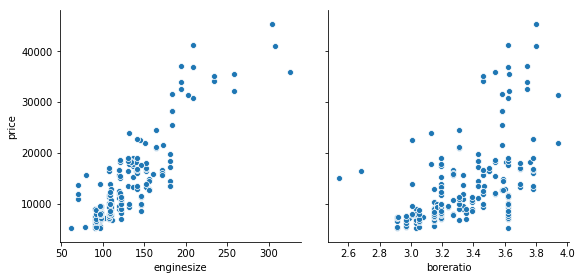

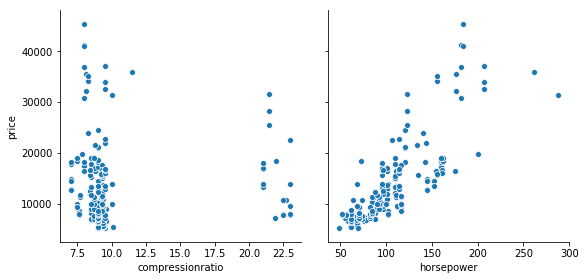

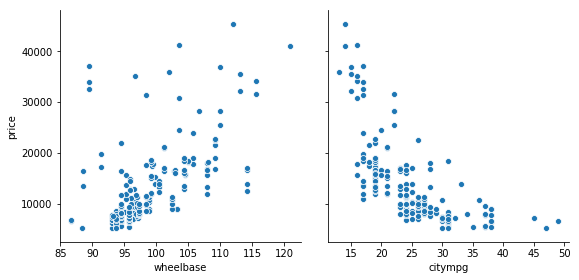

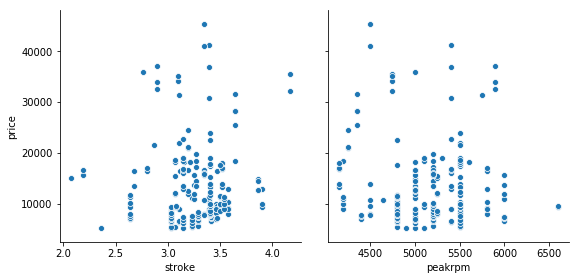

In [81]:
import warnings
warnings.filterwarnings('ignore')
def pp(x,y):
    sns.pairplot(car_pricing, x_vars=[x,y], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio')
pp('compressionratio', 'horsepower')
pp('wheelbase', 'citympg')
pp('stroke', 'peakrpm')

### 1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
### 2. citympg  - seem to have a significant negative correlation with price.

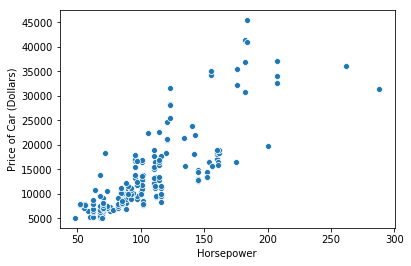

In [82]:
# horse power vs price
plt1 = sns.scatterplot(x = 'horsepower', y = 'price',data = car_pricing)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

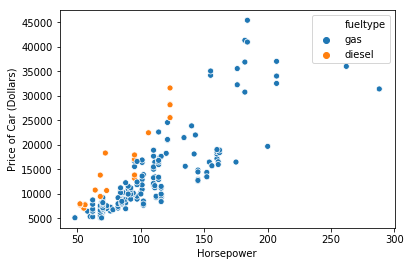

In [83]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = car_pricing)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

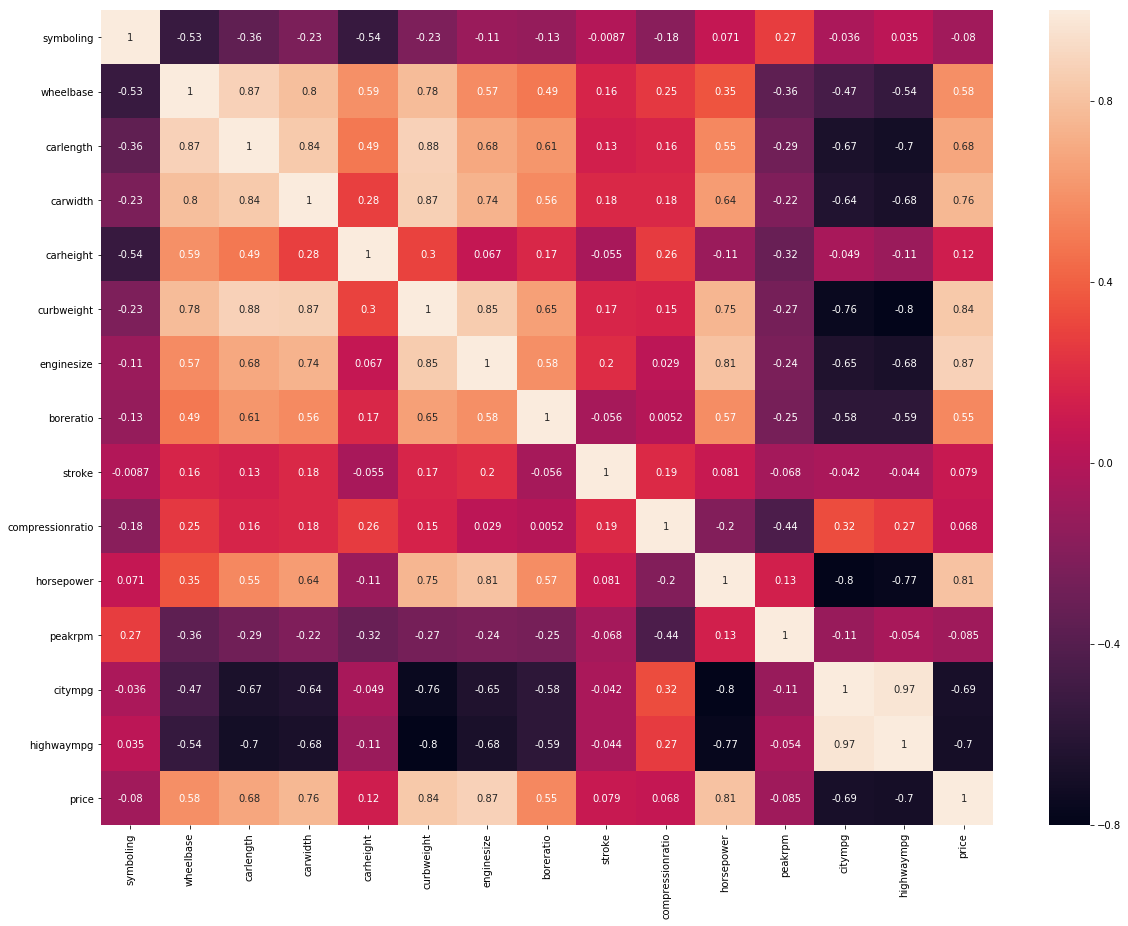

In [84]:
#finding corelation between all variables
plt.figure(figsize = (20,15))  
sns.heatmap(car_pricing.corr(),annot = True)

In [85]:
# Toyota has considerably high no of models in the market.
# Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.
# Some of the Luxury brans are
df_comp_avg_price = car_pricing[['CompanyName','price']].groupby("CompanyName", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
car_pricing = car_pricing.merge(df_comp_avg_price, on = 'CompanyName')
car_pricing['brand_category'] = car_pricing['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

**From the above  analysis we can filter out variables which does not affect price much.
<br>The most important driver variable for prediction of price are:-**

- CompanyName
- Fuel Type
- Aspiration
- Car Body
- Drive Wheel
- Wheelbase
- Car Length
- Car Width
- Curb weight
- Engine Type
- Cylinder Number
- Engine Size
- Bore Ratio
- Horsepower
- citympg


# Linear Regression Model

In [86]:
cars_lr = car_pricing[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength',
                       'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'citympg']]

In [87]:
cars_lr.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,citympg
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,21
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,21
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,19
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,24
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,18


<Figure size 1440x1080 with 0 Axes>

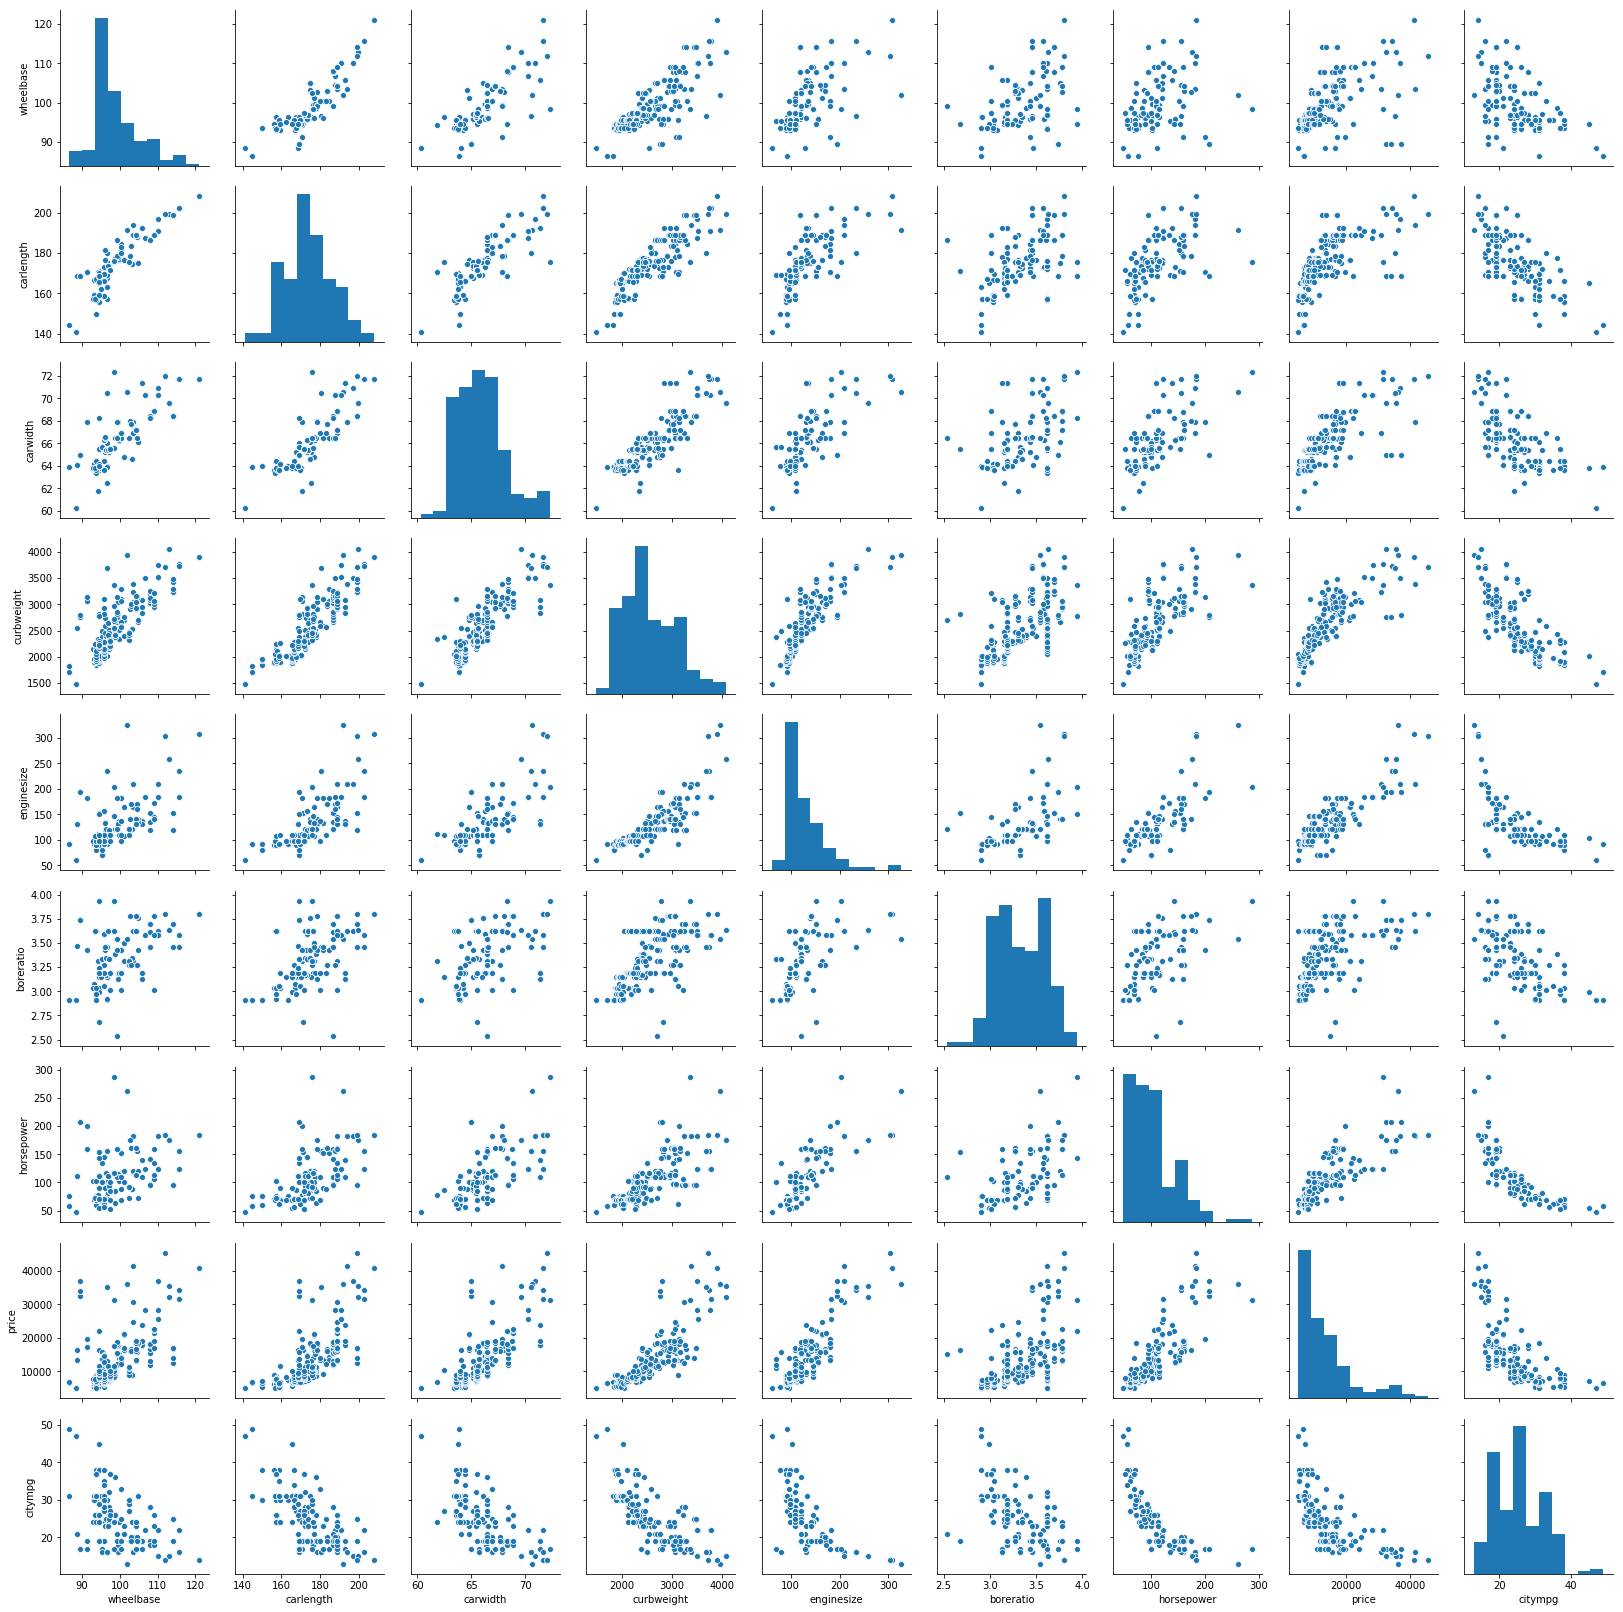

In [88]:
plt.figure(figsize=(20, 15))
sns.pairplot(cars_lr)
plt.show()

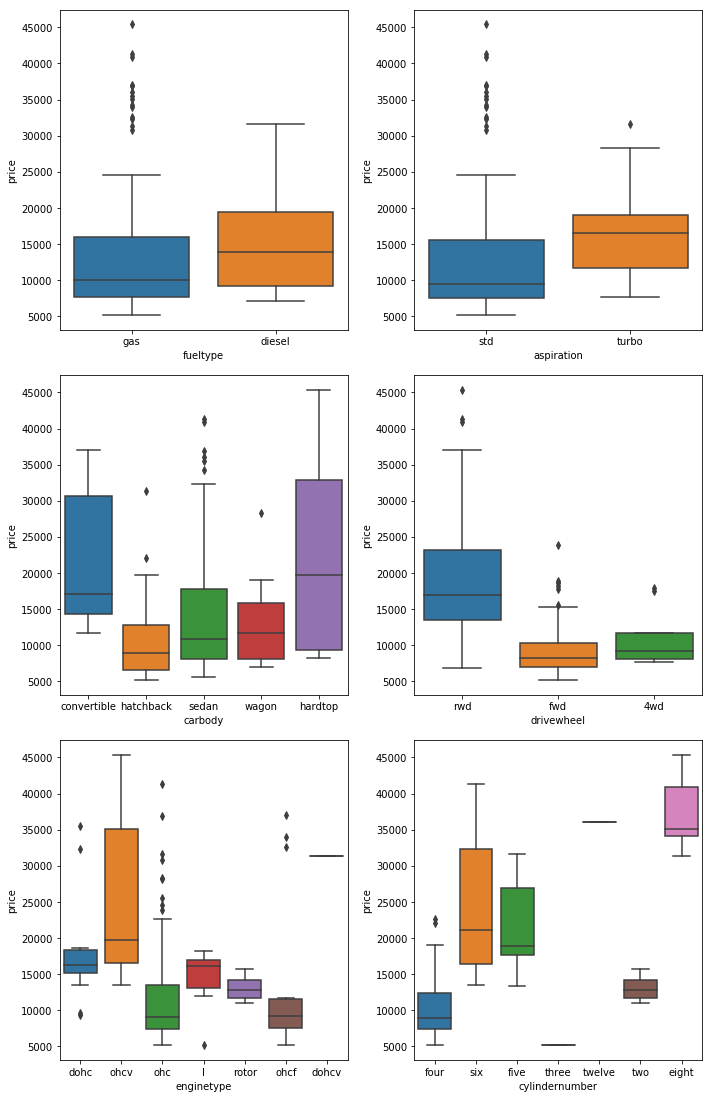

In [89]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_lr)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_lr)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_lr)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_lr)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_lr)
plt.subplot(4,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_lr)
plt.tight_layout()
plt.show()

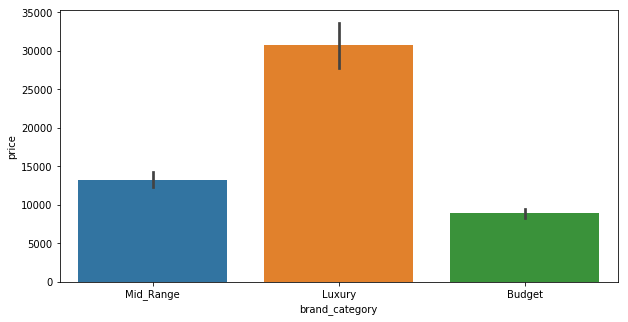

In [90]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'brand_category', y = 'price', data = cars_lr)

## Step 3: Data Preparation

- Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [91]:
cyl_no  = pd.get_dummies(cars_lr['cylindernumber'], drop_first = True)
cars_lr = pd.concat([cars_lr, cyl_no ], axis = 1)

In [92]:
Comp_Name = pd.get_dummies(cars_lr['brand_category'], drop_first = True)
cars_lr = pd.concat([cars_lr, Comp_Name], axis = 1)

eng_typ  = pd.get_dummies(cars_lr['enginetype'], drop_first = True)
cars_lr = pd.concat([cars_lr, eng_typ ], axis = 1)

drwh  = pd.get_dummies(cars_lr['drivewheel'], drop_first = True)
cars_lr = pd.concat([cars_lr, drwh ], axis = 1)

carb  = pd.get_dummies(cars_lr['carbody'], drop_first = True)
cars_lr = pd.concat([cars_lr, carb ], axis = 1)

asp  = pd.get_dummies(cars_lr['aspiration'], drop_first = True)
cars_lr = pd.concat([cars_lr, asp ], axis = 1)

fuelt  = pd.get_dummies(cars_lr['fueltype'], drop_first = True)
cars_lr = pd.concat([cars_lr, fuelt ], axis = 1)

In [93]:
cars_lr.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel',
           'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

In [94]:
cars_lr.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,citympg,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,21,0,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,21,0,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,19,0,...,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,24,0,...,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,18,1,...,0,0,0,0,0,0,1,0,0,1


In [95]:
cars_lr.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'citympg', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'Luxury', 'Mid_Range', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'turbo', 'gas'],
      dtype='object')

In [96]:
cars_lr.shape

(205, 31)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [97]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using Min-Max scaler


In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','citympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [100]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,citympg,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.500000,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.166667,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.361111,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.222222,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.111111,0,...,0,0,0,1,0,0,0,1,1,1


In [101]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,citympg,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.344211,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.186165,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.333333,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.500000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


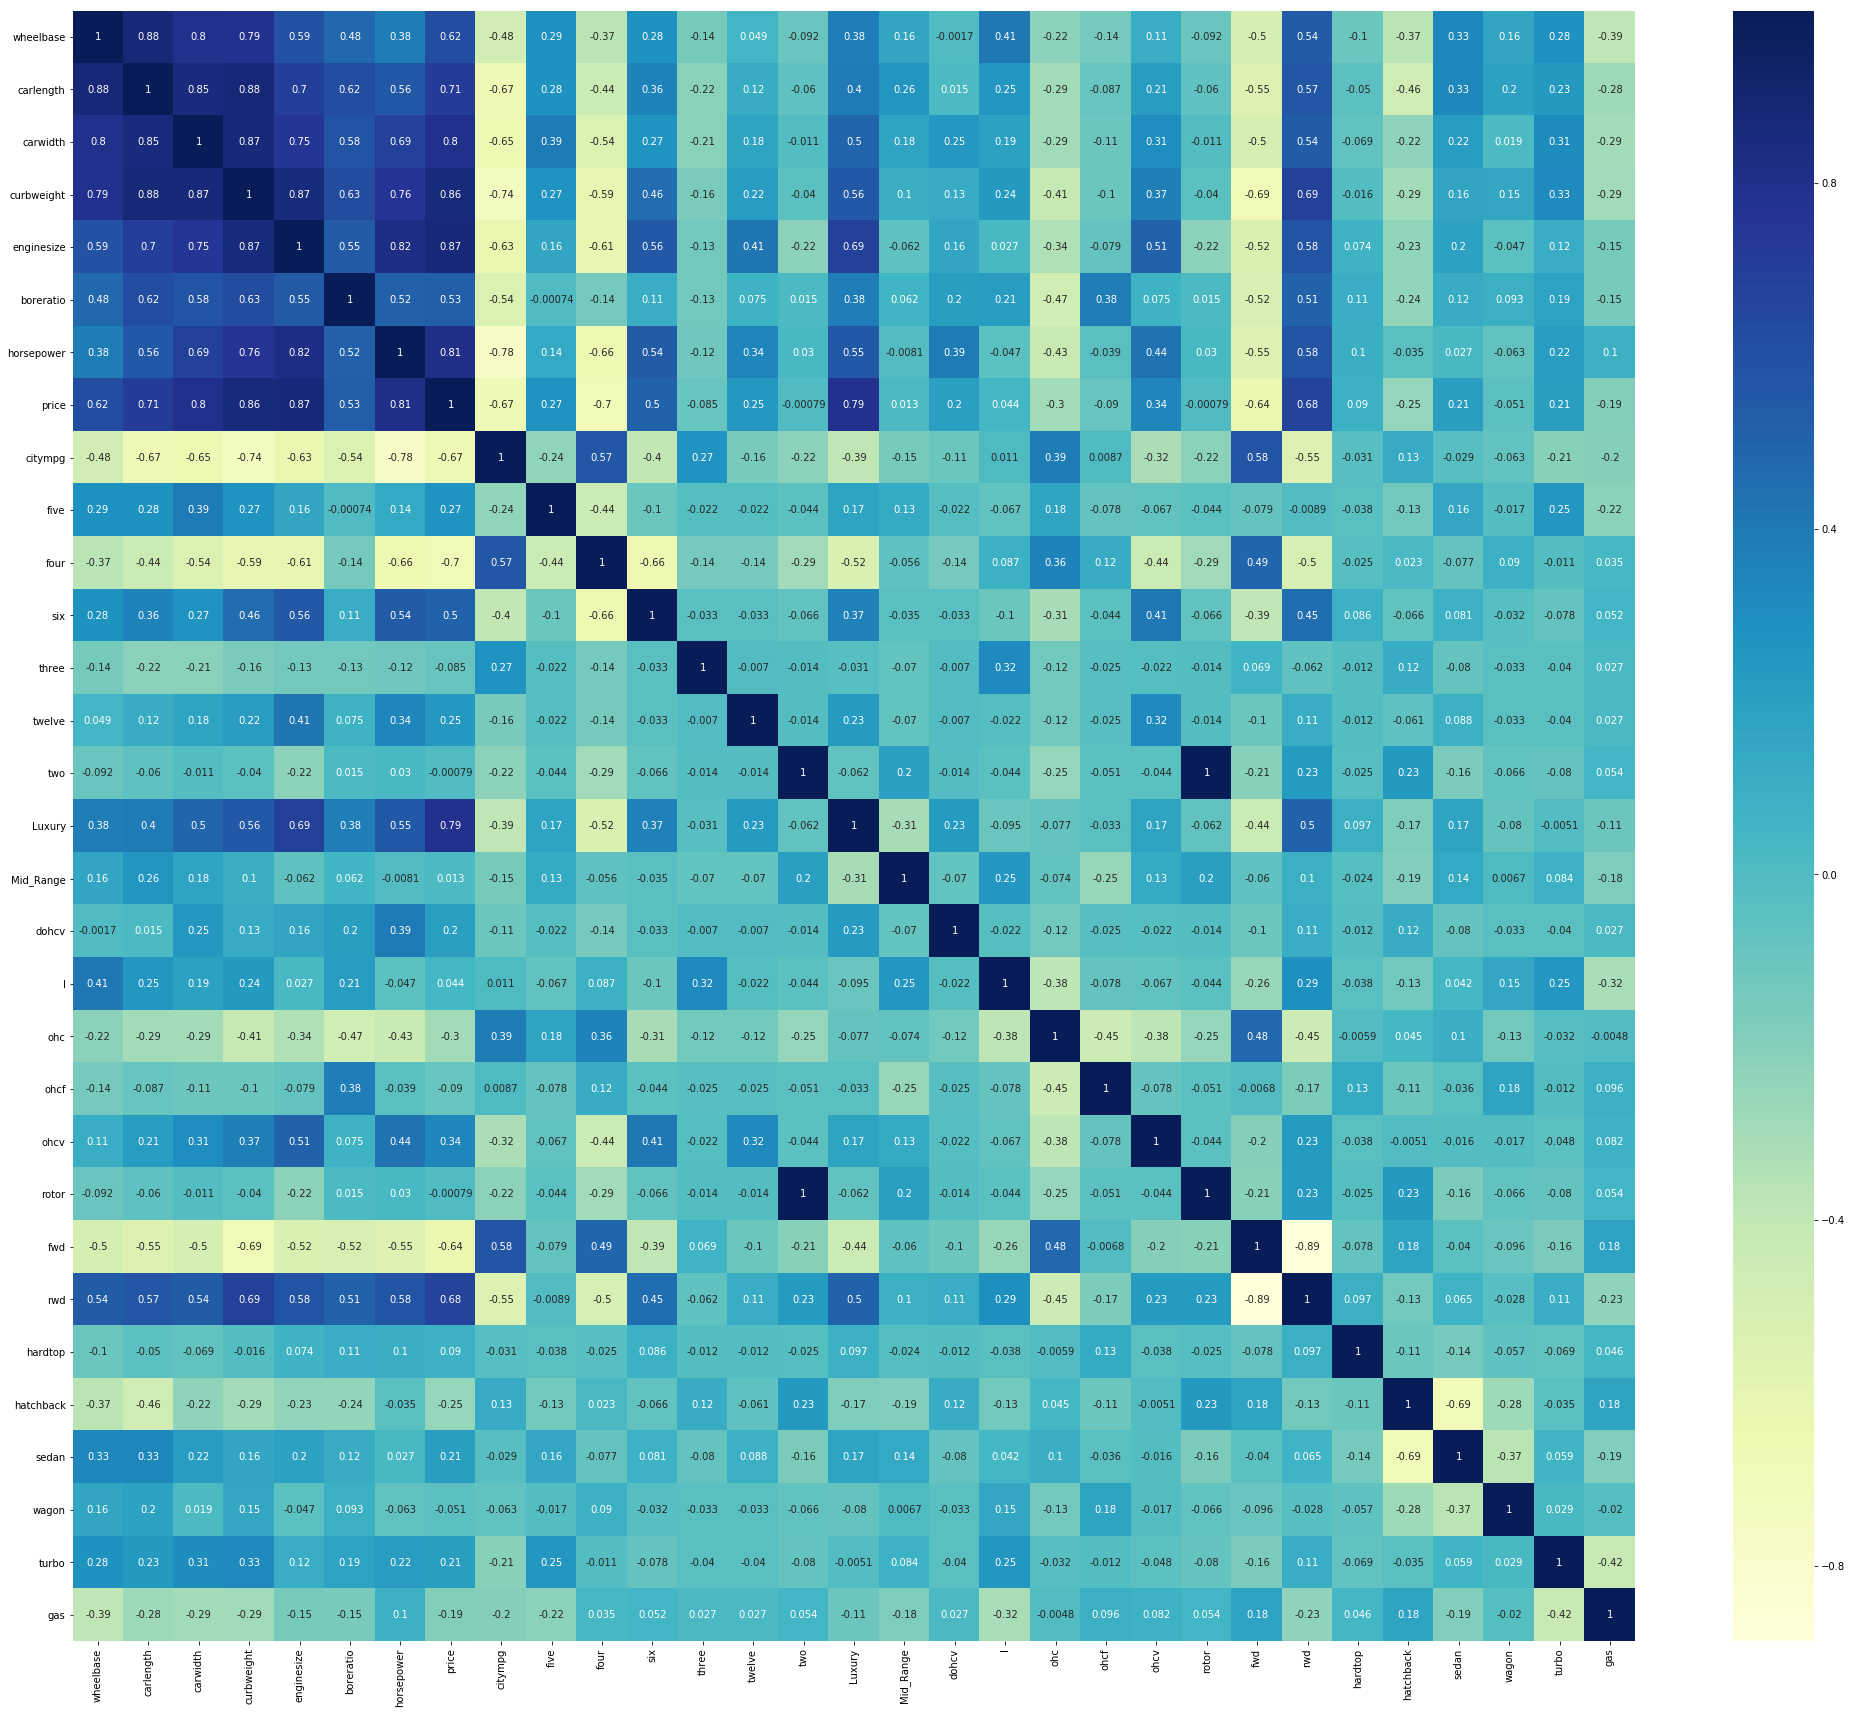

In [102]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [103]:
y_train = df_train.pop('price')
X_train = df_train

### RFE

Recursive feature elimination

In [104]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [105]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('citympg', True, 1),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 6),
 ('three', False, 13),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Luxury', True, 1),
 ('Mid_Range', False, 12),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 18),
 ('gas', False, 17)]

In [124]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'citympg', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

## Step 5: Building a linear model

### Building model using statsmodel, for the detailed statistics

In [125]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [126]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [127]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [128]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.21e-70
Time:                        09:56:13   Log-Likelihood:                 205.91
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     132   BIC:                            -357.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0919      0.041     -2.268      0.0

In [226]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.96
2,curbweight,8.32
9,sedan,6.17
3,horsepower,6.06
8,hatchback,5.68
1,carwidth,5.18
10,wagon,3.62
4,citympg,3.53
6,Luxury,1.68
7,dohcv,1.68


generally want a VIF that is less than 5. So there are clearly some variables we need to drop

In [129]:
# Dropping twelve as p-value is high.
X_train_new1 = X_train_rfe.drop(["twelve"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.15e-71
Time:                        09:56:19   Log-Likelihood:                 204.19
No. Observations:                 143   AIC:                            -388.4
Df Residuals:                     133   BIC:                            -358.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0737      0.040     -1.862      0.0

In [130]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.80
2,curbweight,8.25
8,sedan,6.12
7,hatchback,5.66
1,carwidth,5.18
3,horsepower,5.14
9,wagon,3.58
4,citympg,3.35
5,Luxury,1.67
6,dohcv,1.58


In [131]:
# Dropping citymap as p value is high.
X_train_new2 = X_train_new1.drop(["citympg"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.86e-72
Time:                        09:56:42   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [132]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.90
2,curbweight,8.10
7,sedan,6.07
6,hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
8,wagon,3.58
4,Luxury,1.63
5,dohcv,1.46


In [133]:
# Dropping curbweight as VIF is high.
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.70e-70
Time:                        09:56:57   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [134]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.89
6,sedan,6.06
5,hatchback,5.54
7,wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
3,Luxury,1.56
4,dohcv,1.21


In [135]:
# Dropping sedan as VIF value is high.
X_train_new4 = X_train_new3.drop(["sedan"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.68e-69
Time:                        09:57:10   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [121]:
# Dropping wagon as p value is high.
X_train_new5 = X_train_new4.drop(["wagon"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.57e-70
Time:                        09:55:22   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [136]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
3,Luxury,1.53
4,dohcv,1.21
5,hatchback,1.13


In [140]:
# Dropping dohcv to see if any change in model.
X_train_new6 = X_train_new5.drop(["dohcv"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.04e-67
Time:                        09:58:34   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

## Step 6: Residual Analysis of the train data


let us plot the histogram of the error terms and see what it looks like

In [141]:
y_train_price = lm.predict(X_train_lm)

Text(0.5,0,'Errors')

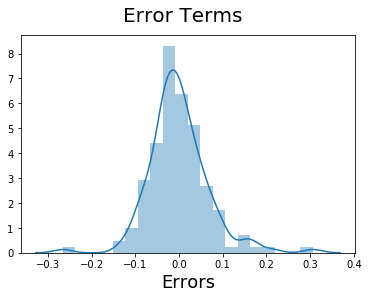

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

the error terms are also normally distributed 

## Step 8: Making Predictions Using the Final Model


#### Applying the scaling on the test sets

In [143]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','citympg']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [144]:
y_test = df_test.pop('price')
X_test = df_test

In [145]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [146]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [147]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8986678382302792

Text(0,0.5,'y_pred')

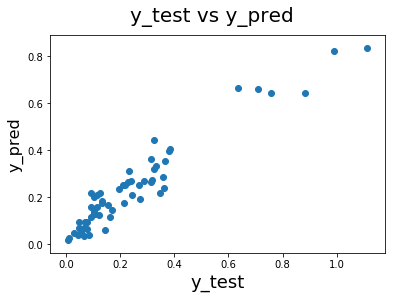

In [148]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          


We can see that the equation of our best fitted line is:

price = 0.3957 carwidth + 0.4402 horsepower + 0.2794 luxury -0.0414 hatchback -0.0824


Text(0,0.5,'Car Price')

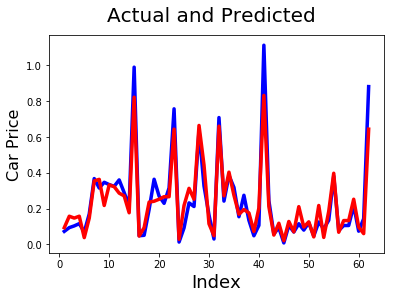

In [161]:
pred=lm.predict(X_train_new6)# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

In [163]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8986678382302792